## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [6]:
a = -1 
b = 2 
x = np.linspace(0,20)
y = a * x + b


In [7]:
print(x)
print(y)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.8367

#### Plot your data points. 

<function matplotlib.pyplot.show(close=None, block=None)>

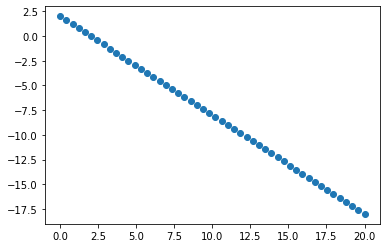

In [8]:
plt.scatter(x,y)
plt.show

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

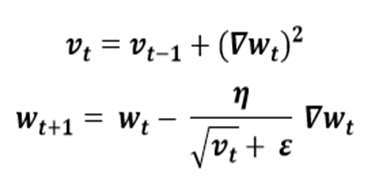

In [66]:
def adagrad_gradient_descent(x, y, lr, maximum_iter):
    x0 = np.ones(x.shape[0])
    x = np.column_stack((x0, x))
    # x = np.insert(x, 0, 1, axis=0) # (50,2)
    theta = np.zeros(x.shape[1]) # (2,1) == (1,2)
    learning_rate = lr
    all_error = [] 
    #all_thetas = theta
    all_thetas_0 = []
    all_thetas_1 = []
    all_h = []
    vt = np.zeros(x.shape[1])
    epsilon = 1e-8
    for i in range(maximum_iter):
        h = x @ theta
        error = (np.linalg.norm(h-y, 2))**2/(2 *x.shape[0])
        all_error.append(error)
        #all_thetas = np.column_stack((all_thetas, theta))
        all_thetas_0.append(theta[0])
        all_thetas_1.append(theta[1])
        all_h.append(h)
        grad = ((h-y).T @ x )/(x.shape[0]) 
        vt = vt + grad ** 2
        theta = theta - (learning_rate* grad) / (np.sqrt(vt) + epsilon)
    h = x @ theta
    error = (np.linalg.norm(h-y, 2))**2/(2 *x.shape[0])
    all_error.append(error)
    all_thetas_0.append(theta[0])
    all_thetas_1.append(theta[1])
    all_h.append(h)
    return  all_thetas_0, all_thetas_1, all_error, all_h, theta

In [101]:
#First Trial
lr = 0.03
maximum_iter = 100
all_thetas_0, all_thetas_1, all_error, all_h, theta = adagrad_gradient_descent(x, y, lr, maximum_iter)

In [102]:
from sklearn.metrics import r2_score
r2_score(y, all_h[-1])

0.48470839932585774

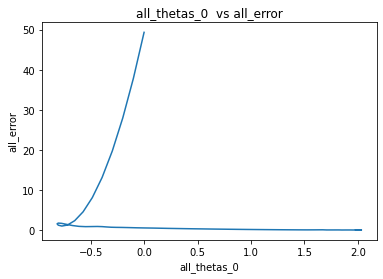

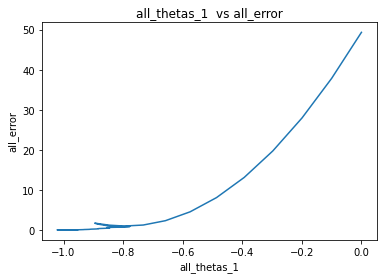

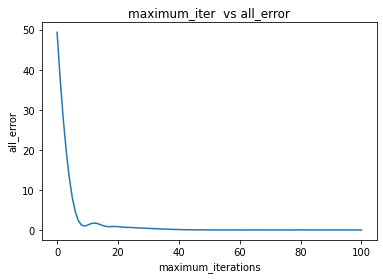

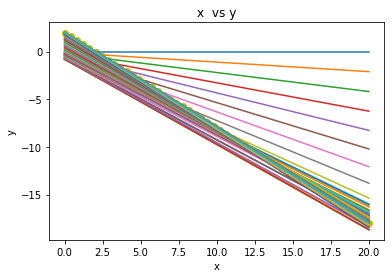

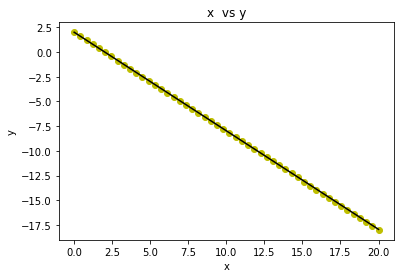

In [130]:
plt.plot(all_thetas_0,all_error)
plt.title("all_thetas_0  vs all_error")
plt.xlabel("all_thetas_0")
plt.ylabel("all_error")
plt.show()
plt.clf()
#---------------------------------------
plt.plot(all_thetas_1,all_error)
plt.title("all_thetas_1  vs all_error")
plt.xlabel("all_thetas_1")
plt.ylabel("all_error")
plt.show()
plt.clf()
#----------------------------------------
plt.plot(range(maximum_iter+1),all_error)
plt.title("maximum_iter  vs all_error")
plt.xlabel("maximum_iterations")
plt.ylabel("all_error")
plt.show()
plt.clf()
#-----------------------------------------
plt.scatter(x, y, color='y')
for i in range(maximum_iter):
    plt.plot(x, all_h[i])
plt.title("x  vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.clf()
#----------------------------------------
plt.scatter(x, y, color='y')
plt.plot(x, all_h[-1], color='k')
plt.title("x  vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [97]:
#Second Trial
lr = 0.1
maximum_iter = 100
all_thetas_0, all_thetas_1, all_error, all_h, theta = adagrad_gradient_descent(x, y, lr, maximum_iter)

In [98]:
from sklearn.metrics import r2_score
r2_score(y, all_h[-1])

0.9520364607763502

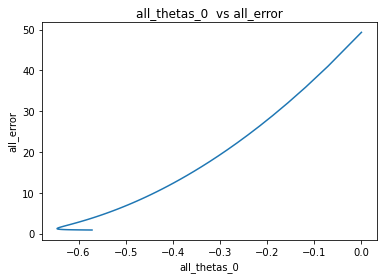

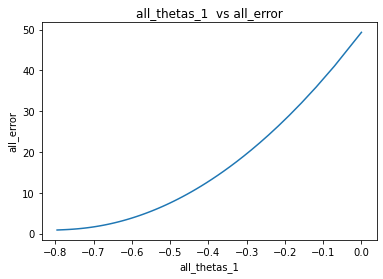

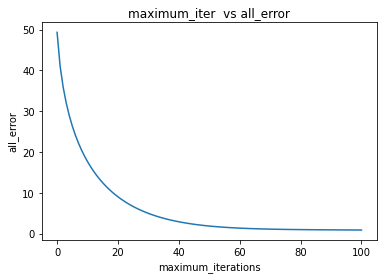

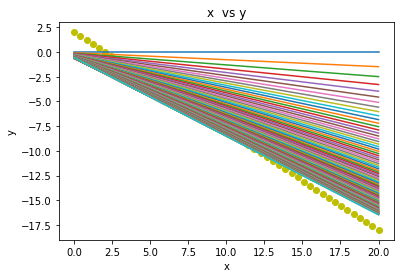

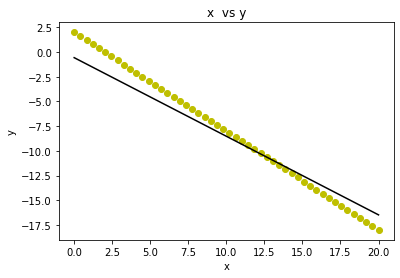

In [90]:
plt.plot(all_thetas_0,all_error)
plt.title("all_thetas_0  vs all_error")
plt.xlabel("all_thetas_0")
plt.ylabel("all_error")
plt.show()
plt.clf()
#---------------------------------------
plt.plot(all_thetas_1,all_error)
plt.title("all_thetas_1  vs all_error")
plt.xlabel("all_thetas_1")
plt.ylabel("all_error")
plt.show()
plt.clf()
#----------------------------------------
plt.plot(range(maximum_iter+1),all_error)
plt.title("maximum_iter  vs all_error")
plt.xlabel("maximum_iterations")
plt.ylabel("all_error")
plt.show()
plt.clf()
#-----------------------------------------
plt.scatter(x, y, color='y')
for i in range(maximum_iter):
    plt.plot(x, all_h[i])
plt.title("x  vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.clf()
#----------------------------------------
plt.scatter(x, y, color='y')
plt.plot(x, all_h[-1], color='k')
plt.title("x  vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

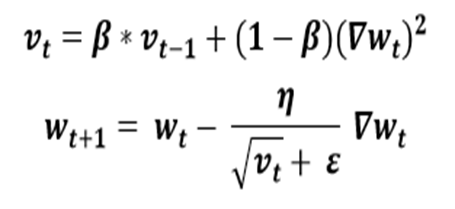

In [75]:
def rmsprop_gradient_descent(x, y, lr, maximum_iter, beta):
    x0 = np.ones(x.shape[0])
    x = np.column_stack((x0, x))
    # x = np.insert(x, 0, 1, axis=0) # (50,2)
    theta = np.zeros(x.shape[1]) # (2,1) == (1,2)
    learning_rate = lr
    all_error = [] 
    all_thetas_0 = []
    all_thetas_1 = []
    all_h = []
    vt = np.zeros(x.shape[1])
    epsilon = 1e-8
    for i in range(maximum_iter):
        h = x @ theta
        error = (np.linalg.norm(h-y, 2))**2/(2 *x.shape[0])
        all_error.append(error)
        all_thetas_0.append(theta[0])
        all_thetas_1.append(theta[1])
        all_h.append(h)
        grad = ((h-y).T @ x )/(x.shape[0]) 
        vt = beta * vt + (1 - beta) * grad ** 2
        theta = theta - (learning_rate* grad) / (np.sqrt(vt) + epsilon)
    h = x @ theta
    error = (np.linalg.norm(h-y, 2))**2/(2 *x.shape[0])
    all_error.append(error)
    all_thetas_0.append(theta[0])
    all_thetas_1.append(theta[1])
    all_h.append(h)
    return all_thetas_0,all_thetas_1, all_error, all_h, theta

In [81]:
#First Trial 
lr = 0.01
maximum_iter = 100
beta = 0.98
all_thetas_0,all_thetas_1, all_error, all_h, theta = rmsprop_gradient_descent(x, y, lr, maximum_iter, beta)

In [103]:
from sklearn.metrics import r2_score
r2_score(y, all_h[-1])

0.48470839932585774

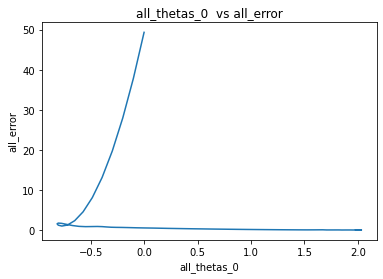

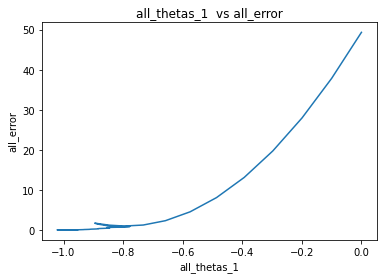

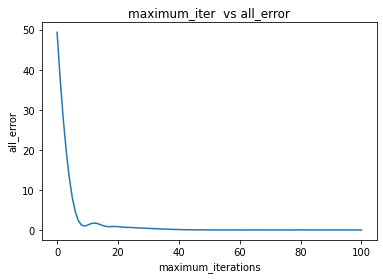

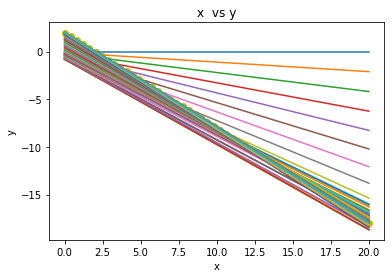

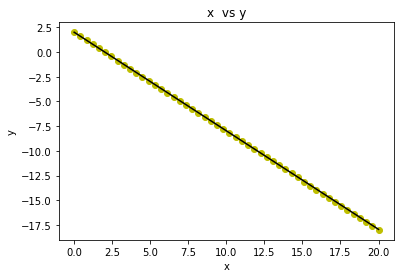

In [129]:
plt.plot(all_thetas_0,all_error)
plt.title("all_thetas_0  vs all_error")
plt.xlabel("all_thetas_0")
plt.ylabel("all_error")
plt.show()
plt.clf()
#---------------------------------------
plt.plot(all_thetas_1,all_error)
plt.title("all_thetas_1  vs all_error")
plt.xlabel("all_thetas_1")
plt.ylabel("all_error")
plt.show()
plt.clf()
#----------------------------------------
plt.plot(range(maximum_iter+1),all_error)
plt.title("maximum_iter  vs all_error")
plt.xlabel("maximum_iterations")
plt.ylabel("all_error")
plt.show()
plt.clf()
#-----------------------------------------
plt.scatter(x, y, color='y')
for i in range(maximum_iter):
    plt.plot(x, all_h[i])
plt.title("x  vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.clf()
#----------------------------------------
plt.scatter(x, y, color='y')
plt.plot(x, all_h[-1], color='k')
plt.title("x  vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [104]:
#Second Trial 
lr = 0.1
maximum_iter = 100
beta = 0.98
all_thetas_0,all_thetas_1, all_error, all_h, theta = rmsprop_gradient_descent(x, y, lr, maximum_iter, beta)

In [105]:
from sklearn.metrics import r2_score
r2_score(y, all_h[-1])

0.99993611177227

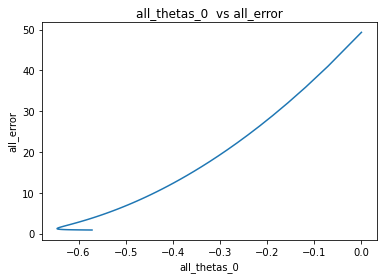

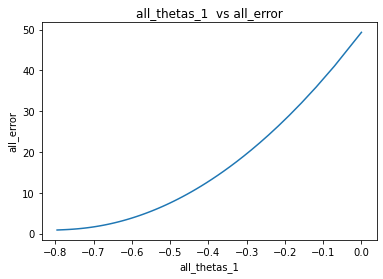

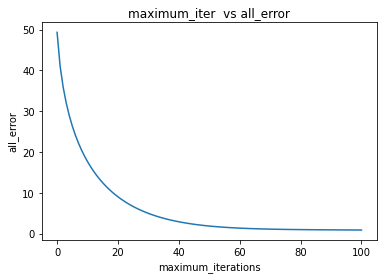

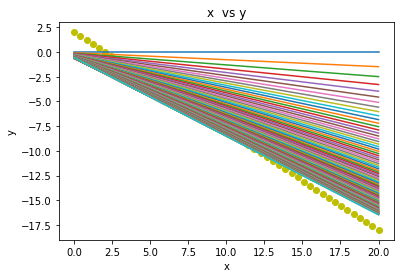

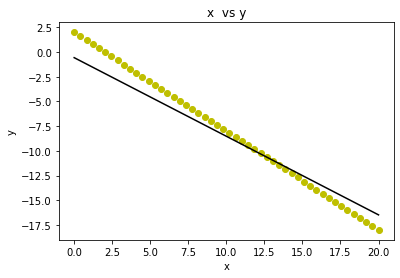

In [89]:
plt.plot(all_thetas_0,all_error)
plt.title("all_thetas_0  vs all_error")
plt.xlabel("all_thetas_0")
plt.ylabel("all_error")
plt.show()
plt.clf()
#---------------------------------------
plt.plot(all_thetas_1,all_error)
plt.title("all_thetas_1  vs all_error")
plt.xlabel("all_thetas_1")
plt.ylabel("all_error")
plt.show()
plt.clf()
#----------------------------------------
plt.plot(range(maximum_iter+1),all_error)
plt.title("maximum_iter  vs all_error")
plt.xlabel("maximum_iterations")
plt.ylabel("all_error")
plt.show()
plt.clf()
#-----------------------------------------
plt.scatter(x, y, color='y')
for i in range(maximum_iter):
    plt.plot(x, all_h[i])
plt.title("x  vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.clf()
#----------------------------------------
plt.scatter(x, y, color='y')
plt.plot(x, all_h[-1], color='k')
plt.title("x  vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

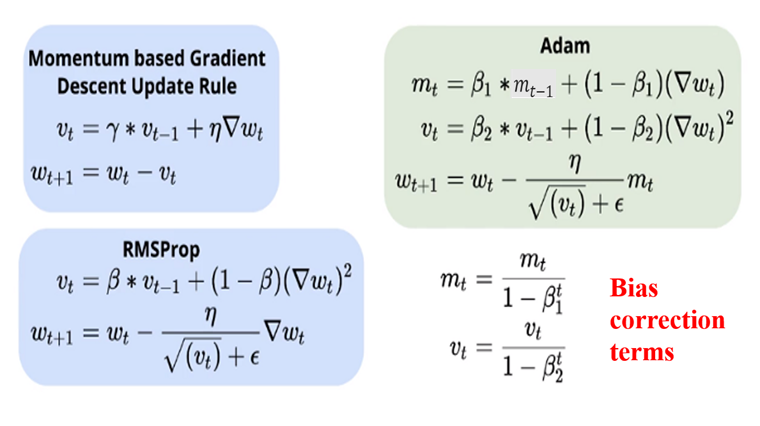

In [107]:
def adam_gradient_descent(x, y, lr, maximum_iter, beta1, beta2):
    x0 = np.ones(x.shape[0])
    x = np.column_stack((x0, x))
    # x = np.insert(x, 0, 1, axis=0) # (50,2)
    theta = np.zeros(x.shape[1]) # (2,1) == (1,2)
    learning_rate = lr
    all_error = [] 
    all_thetas_0 = []
    all_thetas_1 = []
    all_h = []
    vt = np.zeros(x.shape[1])
    epsilon = 1e-8
    mt = np.zeros(x.shape[1])
    for i in range(1, maximum_iter+1):
        h = x @ theta
        error = (np.linalg.norm(h-y, 2))**2/(2 *x.shape[0])
        all_error.append(error)
        all_thetas_0.append(theta[0])
        all_thetas_1.append(theta[1])
        all_h.append(h)
        grad = ((h-y).T @ x )/(x.shape[0]) 
        mt = beta1 * mt + (1 - beta1) * grad
        vt = beta2 * vt + (1 - beta2) * grad ** 2
        mt_corrective = mt / (1 - beta1 ** i)
        vt_corrective = vt / (1 - beta2 ** i)
        theta = theta - (learning_rate* mt_corrective) / (np.sqrt(vt_corrective) + epsilon)
    h = x @ theta
    error = (np.linalg.norm(h-y, 2))**2/(2 *x.shape[0])
    all_error.append(error)
    all_thetas_0.append(theta[0])
    all_thetas_1.append(theta[1])
    all_h.append(h)
    return all_thetas_0,all_thetas_1, all_error, all_h, theta

In [124]:
lr = 0.001
maximum_iter = 1000
beta1 = 0.7
beta2 = 0.8
all_thetas_0,all_thetas_1, all_error, all_h, theta = adam_gradient_descent(x, y, lr, maximum_iter, beta1, beta2)

In [125]:
from sklearn.metrics import r2_score
r2_score(y, all_h[-1])

0.9551654982131929

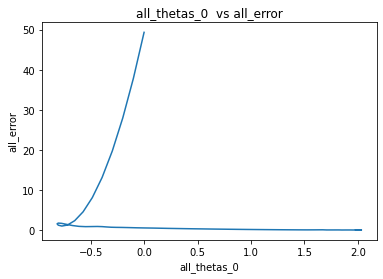

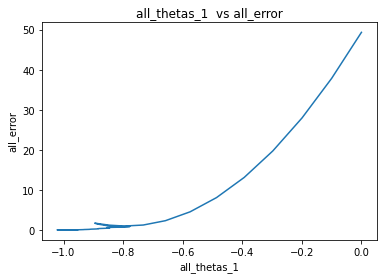

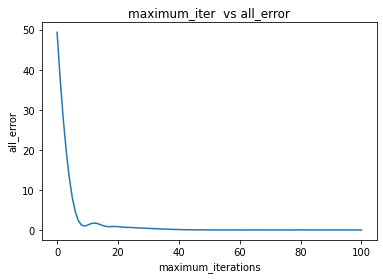

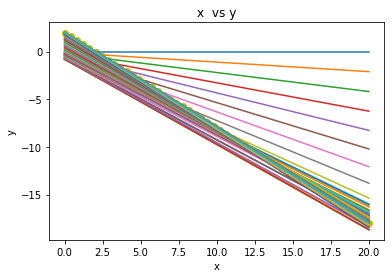

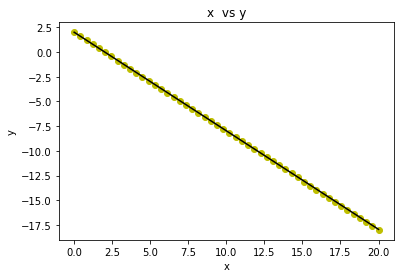

In [128]:
plt.plot(all_thetas_0,all_error)
plt.title("all_thetas_0  vs all_error")
plt.xlabel("all_thetas_0")
plt.ylabel("all_error")
plt.show()
plt.clf()
#---------------------------------------
plt.plot(all_thetas_1,all_error)
plt.title("all_thetas_1  vs all_error")
plt.xlabel("all_thetas_1")
plt.ylabel("all_error")
plt.show()
plt.clf()
#----------------------------------------
plt.plot(range(maximum_iter+1),all_error)
plt.title("maximum_iter  vs all_error")
plt.xlabel("maximum_iterations")
plt.ylabel("all_error")
plt.show()
plt.clf()
#-----------------------------------------
plt.scatter(x, y, color='y')
for i in range(maximum_iter):
    plt.plot(x, all_h[i])
plt.title("x  vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.clf()
#----------------------------------------
plt.scatter(x, y, color='y')
plt.plot(x, all_h[-1], color='k')
plt.title("x  vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [126]:
lr = 0.1
maximum_iter = 100
beta1 = 0.7
beta2 = 0.8
all_thetas_0,all_thetas_1, all_error, all_h, theta = adam_gradient_descent(x, y, lr, maximum_iter, beta1, beta2)

In [127]:
from sklearn.metrics import r2_score
r2_score(y, all_h[-1])

0.9999699969152263

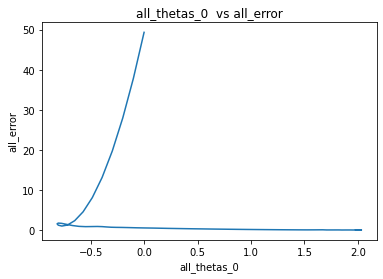

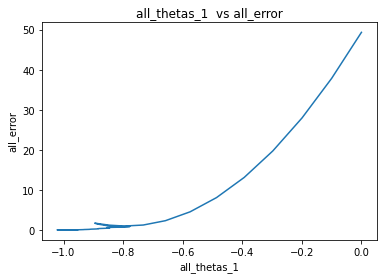

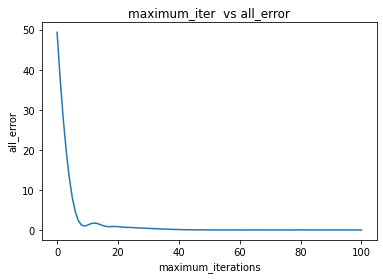

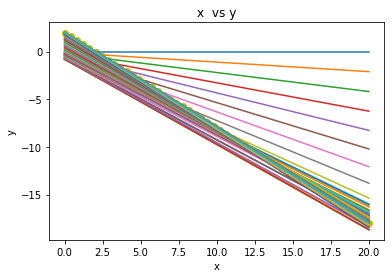

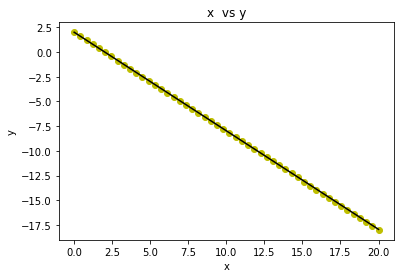

In [117]:
plt.plot(all_thetas_0,all_error)
plt.title("all_thetas_0  vs all_error")
plt.xlabel("all_thetas_0")
plt.ylabel("all_error")
plt.show()
plt.clf()
#---------------------------------------
plt.plot(all_thetas_1,all_error)
plt.title("all_thetas_1  vs all_error")
plt.xlabel("all_thetas_1")
plt.ylabel("all_error")
plt.show()
plt.clf()
#----------------------------------------
plt.plot(range(maximum_iter+1),all_error)
plt.title("maximum_iter  vs all_error")
plt.xlabel("maximum_iterations")
plt.ylabel("all_error")
plt.show()
plt.clf()
#-----------------------------------------
plt.scatter(x, y, color='y')
for i in range(maximum_iter):
    plt.plot(x, all_h[i])
plt.title("x  vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.clf()
#----------------------------------------
plt.scatter(x, y, color='y')
plt.plot(x, all_h[-1], color='k')
plt.title("x  vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Congratulations 
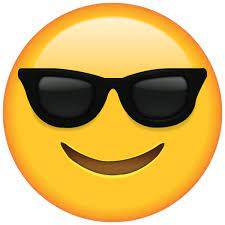